<a href="https://colab.research.google.com/github/Armin-Abdollahi/Signal-Processing/blob/main/MNE_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MNE Tutorial

In [1]:
from google.colab import drive
drive.mount('../content/drive')

Mounted at ../content/drive


In [2]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 25.1 MB/s eta 0:00:00


In [3]:
import mne
import matplotlib.pyplot as plt

In [4]:
image_dir="/content/drive/MyDrive/BCI_Database/PN00-4.edf"

In [5]:
raw = mne.io.read_raw_edf(image_dir, preload=True)

Extracting EDF parameters from /content/drive/MyDrive/BCI_Database/PN00-4.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1076223  =      0.000 ...  2101.998 secs...


In [6]:
dir(raw)

['__class__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_annotations',
 '_cals',
 '_check_bad_segment',
 '_comp',
 '_cropped_samp',
 '_data',
 '_dtype',
 '_dtype_',
 '_extra_attributes',
 '_filenames',
 '_first_samps',
 '_first_time',
 '_get_buffer_size',
 '_get_channel_positions',
 '_getitem',
 '_handle_tmin_tmax',
 '_init_kwargs',
 '_last_samps',
 '_last_time',
 '_orig_units',
 '_parse_get_set_params',
 '_pick_drop_channels',
 '_pick_projs',
 '_preload_data',
 '_projector',
 '_projectors',
 '_raw_extras',
 '_raw_lengths',
 '_read_comp_grade',
 '_read_picks',
 '_read_segment',

In [7]:
raw.crop?

In [8]:
raw.filter?

In [9]:
raw.filter(1,20)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Measurement date,"January 01, 2016 20:51:43 GMT"
Experimenter,Unknown
Participant,
Digitized points,Not available
Good channels,35 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,1.59 Hz
Lowpass,20.00 Hz


Using matplotlib as 2D backend.


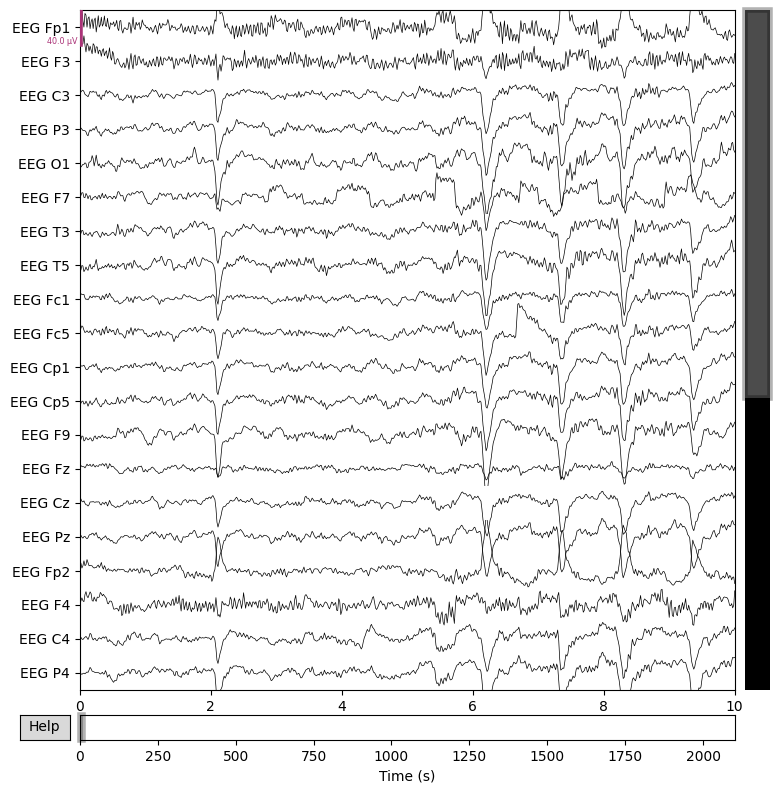

In [10]:
raw.plot();

In [11]:
ica = mne.preprocessing.ICA(n_components=20, random_state=0)

In [12]:
ica.fit(raw.copy().filter(8, 35))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 845 samples (1.650 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Fitting ICA to data using 35 channels (please be patient, this may take a while)
Selecting by number: 20 components
Fitting ICA took 73.9s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,36 iterations on raw data (1076224 samples)
ICA components,20
Available PCA components,35
Channel types,eeg
ICA components marked for exclusion,—


In [13]:
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage, on_missing='ignore')

Measurement date,"January 01, 2016 20:51:43 GMT"
Experimenter,Unknown
Participant,
Digitized points,3 points
Good channels,35 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,1.59 Hz
Lowpass,20.00 Hz


In [14]:
ica.plot_components(outlines="skirt");

RuntimeError: No digitization points found.

In [ ]:
ica.exclude = [1, 10, 14, 17, 18, 19]

In [ ]:
bad_idx, scores = ica.find_bads_eog(raw, 'S02', threshold=2)
print(bad_idx)

In [ ]:
raw.plot();

In [ ]:
ica.apply(raw.copy(), exclude=ica.exclude).plot();

In [ ]:
plt.rcParams["figure.figsize"]=20,10

In [ ]:
mne.find_events?

In [ ]:
events = mne.find_events(raw)

In [ ]:
events

In [ ]:
mne.viz.plot_events(events[:100]);

In [ ]:
event_ids = {"standard/stimulus": 200, "target/stimulus": 100}

epochs = mne.Epochs(raw, events, events_id=event_ids)

In [ ]:
epochs.plot();

In [ ]:
epochs = ica.apply(epochs, exclude=ica.exclude)

In [ ]:
epochs = mne.Epochs(raw, events, events_id=event_ids, preload=True)
epochs = ica.apply(epochs, exclude=ica.exclude)